# Predict student performance
Data comes from: https://archive.ics.uci.edu/dataset/320/student+performance

In [4]:
#@title import libraries
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn import linear_model


!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [5]:
#@title Fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
Y = student_performance.data.targets

## I'm not going to use the whole dataset, rather only some columns that I find more useful/interesting
- studytime - weekly study time, numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours
- failures - number of past class failures, numeric: n if 1<=n<3, else 4
- schoolsup - extra educational support, binary: yes or no
- higher - wants to take higher education, binary: yes or no
- absences - number of school absences, numeric 0 - 93
- G1 and G2 - first grade, second grade, numeric 0 - 20

In [6]:
#@title Preparing data

X = X.filter(items=['studytime', 'failures', 'schoolsup', 'higher', 'absences'])
grd = Y.filter(items=['G1', 'G2'])
X = X.join(grd)
print(X.head())
x = X.values
mask_yes = x == 'yes'
mask = mask_yes
x[mask] = 1

mask_no = x == 'no'
mask = mask_no
x[mask] = 0
x = np.float32(x)
Y = Y.filter(items=['G3'])
y = Y.values
print(x.shape, y.shape)

   studytime  failures schoolsup higher  absences  G1  G2
0          2         0       yes    yes         4   0  11
1          2         0        no    yes         2   9  11
2          2         0       yes    yes         6  12  13
3          3         0        no    yes         0  14  14
4          2         0        no    yes         0  11  13
(649, 7) (649, 1)


In [7]:
#@title Separate data to training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(584, 7) (65, 7) (584, 1) (65, 1)


In [8]:
#@title Train model

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Coefficient: ', linear.coef_)
print('Intercept: ', linear.intercept_)

0.9112659769571074
Coefficient:  [[ 0.10189509 -0.21857601 -0.17209136  0.16386868  0.02477208  0.13490522
   0.8871041 ]]
Intercept:  [-0.272192]


## Down here we can visualise how different data may affect the final grade

Text(0, 0.5, 'Final grade')

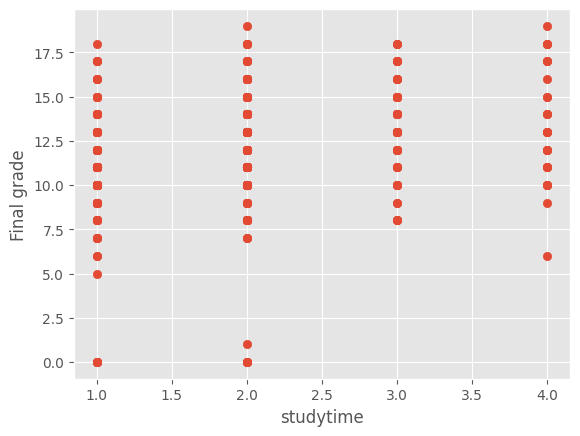

In [9]:
#@title Scatter plot

p = 'studytime'
X_copy = X.copy()
X_copy = X_copy.filter(items=[p])
style.use('ggplot')
plt.scatter(X_copy.values, Y.values)
plt.xlabel(p)
plt.ylabel('Final grade')